# Economic Order Quantity (EOQ) Analysis - Solution

You're a supply chain analyst at TechParts Inc., a manufacturer of electronic components. You need to determine the optimal order quantities for various parts to minimize total inventory costs.

The EOQ model helps find the order quantity that minimizes the sum of:
- Annual ordering costs
- Annual holding costs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Basic EOQ Calculation

Calculate the Economic Order Quantity for a single product with the following parameters:
- Annual demand (D) = 1000 units
- Ordering cost (S) = $100 per order
- Holding cost (H) = $20 per unit per year

In [3]:
# Define parameters
D = 1000  # Annual demand
S = 100   # Ordering cost per order
H = 20    # Holding cost per unit per year

# Calculate EOQ
eoq = np.sqrt(2 * D * S / H)

# Calculate optimal number of orders per year
orders_per_year = D / eoq

# Calculate optimal cycle time (in days)
cycle_time = 365 / orders_per_year

print(f'Economic Order Quantity: {eoq:.1f} units')
print(f'Optimal number of orders per year: {orders_per_year:.1f}')
print(f'Optimal cycle time: {cycle_time:.1f} days')

Economic Order Quantity: 100.0 units
Optimal number of orders per year: 10.0
Optimal cycle time: 36.5 days


## Part 2: Total Cost Analysis

Calculate and visualize how total cost varies with order quantity.

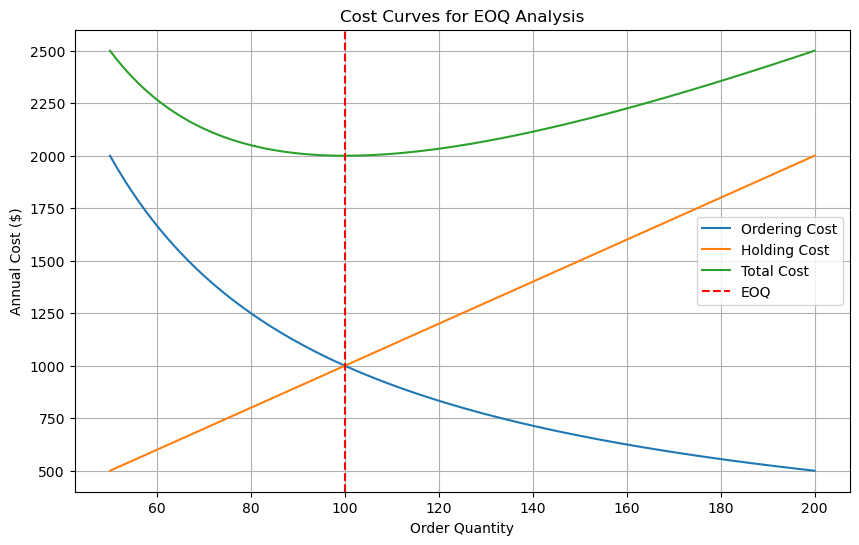

Minimum total cost: $2000.00
Total cost at 80% of EOQ: $2050.00 (2.5% increase)
Total cost at 120% of EOQ: $2033.33 (1.7% increase)


In [4]:
# Create range of order quantities
Q = np.linspace(eoq/2, eoq*2, 100)

# Calculate costs
ordering_costs = (D/Q) * S
holding_costs = (Q/2) * H
total_costs = ordering_costs + holding_costs

# Create cost curve plot
plt.figure(figsize=(10, 6))
plt.plot(Q, ordering_costs, label='Ordering Cost')
plt.plot(Q, holding_costs, label='Holding Cost')
plt.plot(Q, total_costs, label='Total Cost')
plt.axvline(x=eoq, color='r', linestyle='--', label='EOQ')

plt.xlabel('Order Quantity')
plt.ylabel('Annual Cost ($)')
plt.title('Cost Curves for EOQ Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Calculate minimum total cost
min_total_cost = np.sqrt(2 * D * S * H)
print(f'Minimum total cost: ${min_total_cost:.2f}')

# Calculate costs at EOQ ±20%
def calculate_total_cost(Q):
    return (D/Q) * S + (Q/2) * H

cost_minus_20 = calculate_total_cost(0.8 * eoq)
cost_plus_20 = calculate_total_cost(1.2 * eoq)

print(f'Total cost at 80% of EOQ: ${cost_minus_20:.2f} ({((cost_minus_20/min_total_cost)-1)*100:.1f}% increase)')
print(f'Total cost at 120% of EOQ: ${cost_plus_20:.2f} ({((cost_plus_20/min_total_cost)-1)*100:.1f}% increase)')

## Part 3: Sensitivity Analysis

Analyze how EOQ changes with different parameter values.

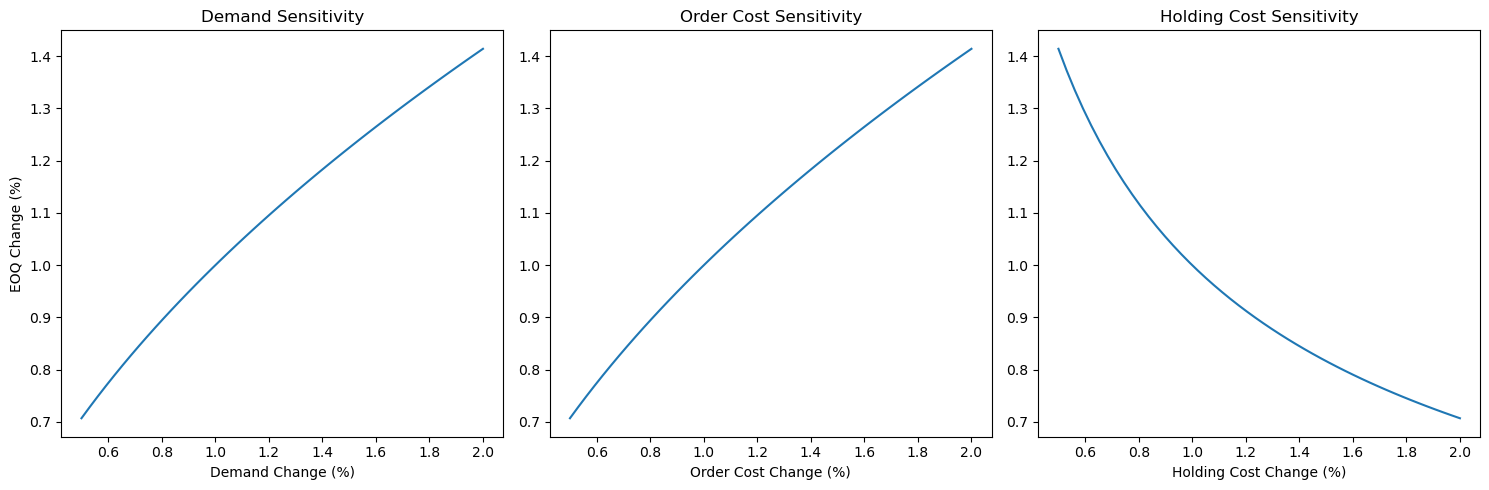

EOQ change with 50% demand increase: 22.5%


In [5]:
def calculate_eoq(D, S, H):
    return np.sqrt(2 * D * S / H)

# Create parameter ranges
demand_range = np.linspace(D/2, D*2, 50)
order_cost_range = np.linspace(S/2, S*2, 50)
holding_cost_range = np.linspace(H/2, H*2, 50)

# Calculate EOQ for each parameter variation
eoq_demand = [calculate_eoq(d, S, H) for d in demand_range]
eoq_order_cost = [calculate_eoq(D, s, H) for s in order_cost_range]
eoq_holding_cost = [calculate_eoq(D, S, h) for h in holding_cost_range]

# Create sensitivity analysis plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(demand_range/D, eoq_demand/eoq)
ax1.set_title('Demand Sensitivity')
ax1.set_xlabel('Demand Change (%)')
ax1.set_ylabel('EOQ Change (%)')

ax2.plot(order_cost_range/S, eoq_order_cost/eoq)
ax2.set_title('Order Cost Sensitivity')
ax2.set_xlabel('Order Cost Change (%)')

ax3.plot(holding_cost_range/H, eoq_holding_cost/eoq)
ax3.set_title('Holding Cost Sensitivity')
ax3.set_xlabel('Holding Cost Change (%)')

plt.tight_layout()
plt.show()

# Calculate specific changes
eoq_50pct_demand = calculate_eoq(D*1.5, S, H)
print(f'EOQ change with 50% demand increase: {((eoq_50pct_demand/eoq)-1)*100:.1f}%')

## Part 4: Multiple Products Analysis

Calculate EOQ for multiple products with different parameters.

Product Analysis Summary:
  Product_ID  Annual_Demand  Order_Cost  Holding_Cost     EOQ  \
0       P001           1360      118.89         38.88   91.20   
1       P002           4272      100.06         47.54  134.10   
2       P003           3592       71.43         10.03  226.18   
3       P004            966      147.63         49.69   75.76   
4       P005           4926       58.46         34.70  128.84   

   Orders_Per_Year  Total_Cost  
0            14.91     3545.81  
1            31.86     6375.17  
2            15.88     2268.81  
3            12.75     3764.64  
4            38.23     4470.52  


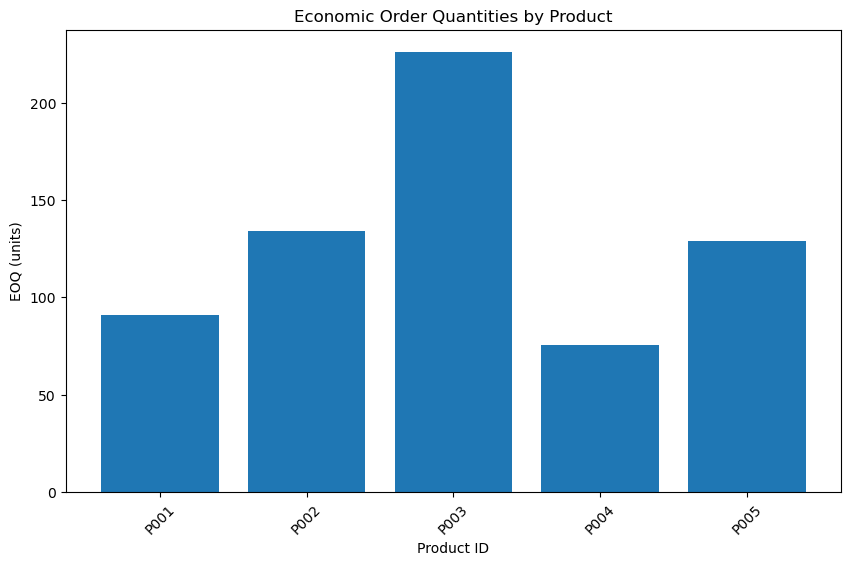


Summary Statistics:
          EOQ  Orders_Per_Year  Total_Cost
count    5.00             5.00        5.00
mean   131.21            22.73     4084.99
std     58.54            11.53     1507.10
min     75.76            12.75     2268.81
25%     91.20            14.91     3545.81
50%    128.84            15.88     3764.64
75%    134.10            31.86     4470.52
max    226.18            38.23     6375.17


In [6]:
# Generate sample data
np.random.seed(42)
n_products = 5

data = {
    'Product_ID': [f'P{i:03d}' for i in range(1, n_products + 1)],
    'Annual_Demand': np.random.randint(500, 5000, n_products),
    'Order_Cost': np.random.uniform(50, 200, n_products),
    'Holding_Cost': np.random.uniform(10, 50, n_products)
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate EOQ and costs for each product
df['EOQ'] = np.sqrt(2 * df['Annual_Demand'] * df['Order_Cost'] / df['Holding_Cost'])
df['Orders_Per_Year'] = df['Annual_Demand'] / df['EOQ']
df['Total_Cost'] = (df['Annual_Demand'] / df['EOQ']) * df['Order_Cost'] + \
                   (df['EOQ'] / 2) * df['Holding_Cost']

# Display results
print("Product Analysis Summary:")
print(df.round(2))

# Visualize EOQ distribution
plt.figure(figsize=(10, 6))
plt.bar(df['Product_ID'], df['EOQ'])
plt.title('Economic Order Quantities by Product')
plt.xlabel('Product ID')
plt.ylabel('EOQ (units)')
plt.xticks(rotation=45)
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(df[['EOQ', 'Orders_Per_Year', 'Total_Cost']].describe().round(2))